# Question: 1

1. Imagine you have a dataset where you have different Instagram features like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time 

# Profile of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("instagram_reach.csv")

In [3]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [5]:
df.shape

(100, 8)

In [6]:
df=df.drop(columns=['Unnamed: 0','S.No'])

In [7]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [10]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [11]:
df.dtypes

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [12]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
num_col=[fea for fea in df.columns if df[fea].dtypes!="o"]

In [15]:
num_col

['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted', 'Likes']

In [16]:
cat_col=[fea for fea in df.columns if df[fea].dtypes=="o"]

In [17]:
cat_col

[]

In [18]:
df.nunique()

USERNAME             95
Caption              94
Followers            94
Hashtags             98
Time since posted    11
Likes                55
dtype: int64

# Statistical analysis

In [19]:
df.cov()

,Followers,Likes
Followers,1.029465e+06,14879.635556
Likes,1.487964e+04,3034.575354


In [20]:
df.corr()

,Followers,Likes
Followers,1.000000,0.266218
Likes,0.266218,1.000000


In [21]:
df.corr( method='pearson')

,Followers,Likes
Followers,1.000000,0.266218
Likes,0.266218,1.000000


In [22]:
df.corr( method='spearman')

,Followers,Likes
Followers,1.000000,0.353675
Likes,0.353675,1.000000


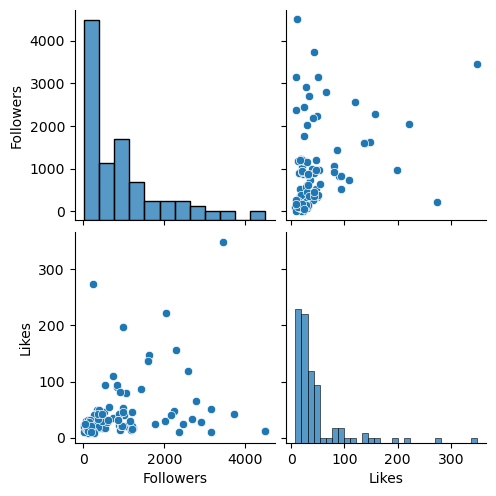

In [23]:
sns.pairplot(df)

<Axes: >

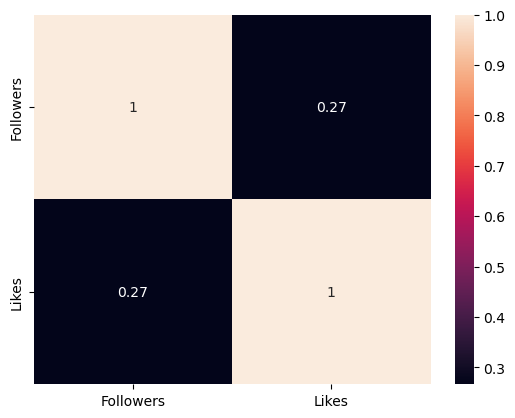

In [24]:
sns.heatmap(df.corr(),annot=True)

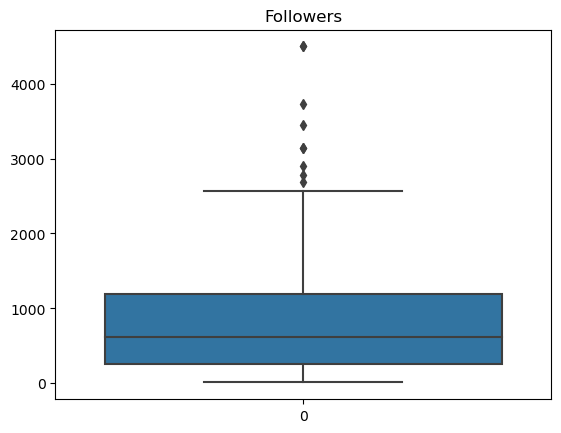

In [25]:
sns.boxplot(df['Followers'])
plt.title('Followers')
plt.show()

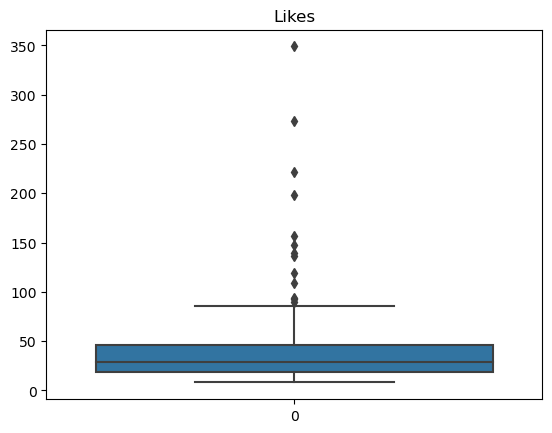

In [26]:
sns.boxplot(df['Likes'])
plt.title('Likes')
plt.show()

# Preprocessing

In [27]:
df['Time since posted']

0     11 hours
1      2 hours
2      2 hours
3      3 hours
4      3 hours
        ...   
95     3 hours
96     3 hours
97     3 hours
98     3 hours
99     3 hours
Name: Time since posted, Length: 100, dtype: object

In [28]:
# Convert 'Time since posted' to numerical format (hours)
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(float)

In [29]:
df['Time since posted']

0     11.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
95     3.0
96     3.0
97     3.0
98     3.0
99     3.0
Name: Time since posted, Length: 100, dtype: float64

In [30]:
# Feature engineering on hashtags (count of hashtags)
df['Num_Hashtags'] = df['Hashtags'].apply(lambda x: len(x.split()))

In [31]:
df['Num_Hashtags']

0      5
1     19
2     20
3     20
4     18
      ..
95    10
96    21
97    22
98    21
99    22
Name: Num_Hashtags, Length: 100, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [33]:
username_encoded = pd.get_dummies(df['USERNAME'], prefix='user')
hashtags_encoded = pd.get_dummies(df['Hashtags'].apply(lambda x: ' '.join(x.split())), prefix='tag')

In [34]:
# Combine encoded features with the original DataFrame
df = pd.concat([df, username_encoded, hashtags_encoded], axis=1)

In [35]:
# Drop unnecessary columns
df.drop(['USERNAME', 'Caption', 'Hashtags'], axis=1, inplace=True)

In [36]:
# Encode the target variable 'Likes' using LabelEncoder (optional)
label_encoder = LabelEncoder()
df['Likes'] = label_encoder.fit_transform(df['Likes'])

# Splitting data

In [37]:
# Features (X) and target variables (y)
X = df.drop('Likes', axis=1)
y_likes = df['Likes']
y_time = df['Time since posted']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Train-test split
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X, y_likes, y_time, test_size=0.2, random_state=42)

# Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model building and Evaluation

In [41]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [42]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}   

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for model_name, model in models.items():
    # For predicting likes
    model.fit(X_train, y_likes_train)
    likes_predictions = model.predict(X_test)
    
    # For predicting time
    model.fit(X_train, y_time_train)
    time_predictions = model.predict(X_test)
    
    mae_likes = mean_absolute_error(y_likes_test, likes_predictions)
    mae_time = mean_absolute_error(y_time_test, time_predictions)
    
    mse_likes = mean_squared_error(y_likes_test, likes_predictions)
    mse_time = mean_squared_error(y_time_test, time_predictions)
    
    r2_likes = r2_score(y_likes_test, likes_predictions)
    r2_time = r2_score(y_time_test, time_predictions)
    
    print(f"{model_name} - Likes: MAE={mae_likes}, MSE={mse_likes}, R^2={r2_likes}")
    print(f"{model_name} - Time: MAE={mae_time}, MSE={mse_time}, R^2={r2_time}")
    print("-----------------------------------------------------")


Linear Regression - Likes: MAE=9.157334272856605, MSE=130.45604463741773, R^2=0.3280570461251483
Linear Regression - Time: MAE=0.08043292547173406, MSE=0.008791214998725629, R^2=0.9992452273021055
-----------------------------------------------------
Decision Tree - Likes: MAE=8.1, MSE=122.1, R^2=0.37109671770174724
Decision Tree - Time: MAE=0.25, MSE=0.65, R^2=0.9441940330543035
-----------------------------------------------------
AdaBoost - Likes: MAE=7.140690773421545, MSE=87.45776958805206, R^2=0.5495292517902519
AdaBoost - Time: MAE=0.5833333333333333, MSE=2.6722222222222216, R^2=0.7705754692232478
-----------------------------------------------------
Gradient Boosting - Likes: MAE=6.459797834130559, MSE=78.87562330762736, R^2=0.5937335103072284
Gradient Boosting - Time: MAE=0.20395632570297417, MSE=0.28867249019656366, R^2=0.9752159270060903
-----------------------------------------------------
SVR - Likes: MAE=10.812256303383455, MSE=202.36232385482438, R^2=-0.04231228243899299